In [1]:
"""

Generate BPT, Blue classification diagrams for Portsmouth BOSS data

27-05-2020

Author: Alan Nguyen

"""

'\n\nGenerate BPT, Blue classification diagrams for Portsmouth BOSS data\n\n27-05-2020\n\nAuthor: Alan Nguyen\n\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, Column
from scipy.optimize import curve_fit, leastsq
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
from BOSS_func_v6 import *
from general_functions_v1 import *

In [3]:
hdul = fits.open("SummerAGNProj2019/portsmouth_emlinekin_full-DR12.fits")

emlinkin_data = hdul[1].data

hdul.close()

In [4]:
z = emlinkin_data['Z']

In [5]:
array_summary(z)

             Count:   1490820
              Mean:   0.4818081557750702
            Median:   0.5053209066390991
Standard Deviation:   0.14781515300273895
           Minimum:   3.169072078890167e-05
           Maximum:   1.9857250452041626


In [6]:
"""
For a BPT, we need OIII5007, NII 6583, SII6717, SII 6731, HBeta, HAlpha

For the blue classification, Use OIII5007/HBeta (flux ratio) against OII3726 + 3729/HBeta (EW ratio)

Additionally must take amplitude over amplitude_error to select

OIII5007 17
NII6583  25
SII6717  26
SII6731  27
HBeta    15
HAlpha   24
OII3726  3
OII3729  4
"""

'\nFor a BPT, we need OIII5007, NII 6583, SII6717, SII 6731, HBeta, HAlpha\n\nFor the blue classification, Use OIII5007/HBeta (flux ratio) against OII3726 + 3729/HBeta (EW ratio)\n\nAdditionally must take amplitude over amplitude_error to select\n\nOIII5007 17\nNII6583  25\nSII6717  26\nSII6731  27\nHBeta    15\nHAlpha   24\nOII3726  3\nOII3729  4\n'

In [7]:
amplitude        = emlinkin_data['AMPLITUDE']
amplitude_error  = emlinkin_data['AMPLITUDE_ERR']

OIII5007_amp     = amplitude[:, 17]
OIII5007_amp_err = amplitude_error[:, 17]

NII6583_amp      = amplitude[:, 25]
NII6583_amp_err  = amplitude_error[:, 25]

SII6717_amp      = amplitude[:, 26]
SII6717_amp_err  = amplitude_error[:, 26]

SII6731_amp      = amplitude[:, 27]
SII6731_amp_err  = amplitude_error[:, 27]

HBeta_amp        = amplitude[:, 15]
HBeta_amp_err    = amplitude_error[:, 15]

HAlpha_amp       = amplitude[:, 24]
HAlpha_amp_err   = amplitude_error[:, 24]

OII3726_amp      = amplitude[:, 3]
OII3726_amp_err  = amplitude_error[:, 3]

OII3729_amp      = amplitude[:, 4]
OII3729_amp_err  = amplitude_error[:, 4]

OIII5007_AN = OIII5007_amp / OIII5007_amp_err
NII6583_AN  =  NII6583_amp / NII6583_amp_err
SII6717_AN  =  SII6717_amp / SII6717_amp_err
SII6731_AN  =  SII6731_amp / SII6731_amp_err
HBeta_AN    =    HBeta_amp / HBeta_amp_err
HAlpha_AN   =   HAlpha_amp / HAlpha_amp_err
OII3726_AN  =  OII3726_amp / OII3726_amp_err
OII3729_AN  =  OII3729_amp / OII3729_amp_err

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in 

In [8]:
select_good_data = (OIII5007_AN>2)&(OIII5007_AN!=np.nan)&(NII6583_AN>2)&(NII6583_AN!=np.nan)&(SII6717_AN>2)&(SII6717_AN!=np.nan)&(SII6731_AN>2)&(SII6731_AN!=np.nan)&(HBeta_AN>2)&(HBeta_AN!=np.nan)&(HAlpha_AN>2)&(HAlpha_AN!=np.nan)&(OII3726_AN>2)&(OII3726_AN!=np.nan)&(OII3729_AN>2)&(OII3729_AN!=np.nan)

In [9]:
emlinkin_good_data = emlinkin_data[select_good_data]

In [10]:
len(emlinkin_good_data)

46139

In [8]:
"""
bin the data into
1 0.00<z<0.15, 14657 sources, BPT
2 0.15<z<0.30, 15899 sources, BPT
3 0.30<z<0.45, 10770 sources, BPT, Blue
4 0.45<z<0.60, 4813  sources, Blue Classification (Lamareille 2010)
5 0.60<z<0.75, 0     sources
"""

'\nbin the data into\n1 0.00<z<0.15, 14657 sources, BPT\n2 0.15<z<0.30, 15899 sources, BPT\n3 0.30<z<0.45, 10770 sources, BPT\n4 0.45<z<0.60, 4813  sources, Blue Classification (Lamareille 2010)\n5 0.60<z<0.75, 0     sources\n'

In [9]:
emlinkin_good_data_z = emlinkin_good_data['Z']

In [12]:
select_bin1 = (0.00<=emlinkin_good_data_z)&(0.15>emlinkin_good_data_z)
select_bin2 = (0.15<=emlinkin_good_data_z)&(0.30>emlinkin_good_data_z)
select_bin3 = (0.30<=emlinkin_good_data_z)&(0.45>emlinkin_good_data_z)
select_bin4 = (0.45<=emlinkin_good_data_z)&(0.60>emlinkin_good_data_z)
# select_bin5 = (0.60<=emlinkin_good_data_z)&(0.75>emlinkin_good_data_z)

In [13]:
emlinkin_good_data1 = emlinkin_good_data[select_bin1]
emlinkin_good_data2 = emlinkin_good_data[select_bin2]
emlinkin_good_data3 = emlinkin_good_data[select_bin3]
emlinkin_good_data4 = emlinkin_good_data[select_bin4]

In [14]:
#PREP THE BPTS

OIII5007_flux1 = emlinkin_good_data1['FLUX'][:, 17]
NII6583_flux1  = emlinkin_good_data1['FLUX'][:, 25]
SII6717_flux1  = emlinkin_good_data1['FLUX'][:, 26]
SII6731_flux1  = emlinkin_good_data1['FLUX'][:, 27]
HBeta_flux1    = emlinkin_good_data1['FLUX'][:, 15]
HAlpha_flux1   = emlinkin_good_data1['FLUX'][:, 24]
SII_flux1      = SII6717_flux1 + SII6731_flux1

#########################################

OIII5007_flux2 = emlinkin_good_data2['FLUX'][:, 17]
NII6583_flux2  = emlinkin_good_data2['FLUX'][:, 25]
SII6717_flux2  = emlinkin_good_data2['FLUX'][:, 26]
SII6731_flux2  = emlinkin_good_data2['FLUX'][:, 27]
HBeta_flux2    = emlinkin_good_data2['FLUX'][:, 15]
HAlpha_flux2   = emlinkin_good_data2['FLUX'][:, 24]
SII_flux2      = SII6717_flux2 + SII6731_flux2

#########################################

OIII5007_flux3 = emlinkin_good_data3['FLUX'][:, 17]
NII6583_flux3  = emlinkin_good_data3['FLUX'][:, 25]
SII6717_flux3  = emlinkin_good_data3['FLUX'][:, 26]
SII6731_flux3  = emlinkin_good_data3['FLUX'][:, 27]
HBeta_flux3    = emlinkin_good_data3['FLUX'][:, 15]
HAlpha_flux3   = emlinkin_good_data3['FLUX'][:, 24]
SII_flux3      = SII6717_flux3 + SII6731_flux3

#########################################

bpt_y_1  = OIII5007_flux1 / HBeta_flux1
bpt_x_1a =  NII6583_flux1 / HAlpha_flux1
bpt_x_1b =      SII_flux1 / HAlpha_flux1

bpt_y_1 = np.log10(bpt_y_1)
bpt_x_1a = np.log10(bpt_x_1a)
bpt_x_1b = np.log10(bpt_x_1b)

#########################################

bpt_y_2  = OIII5007_flux2 / HBeta_flux2
bpt_x_2a =  NII6583_flux2 / HAlpha_flux2
bpt_x_2b =      SII_flux2 / HAlpha_flux2

bpt_y_2 = np.log10(bpt_y_2)
bpt_x_2a = np.log10(bpt_x_2a)
bpt_x_2b = np.log10(bpt_x_2b)

#########################################

bpt_y_3  = OIII5007_flux3 / HBeta_flux3
bpt_x_3a =  NII6583_flux3 / HAlpha_flux3
bpt_x_3b =      SII_flux3 / HAlpha_flux3

bpt_y_3 = np.log10(bpt_y_3)
bpt_x_3a = np.log10(bpt_x_3a)
bpt_x_3b = np.log10(bpt_x_3b)

#########################################


"""
BPT uses the log of the flux ratios
"""

In [15]:
#classify galaxies based on BPT diagrams

# 0 fail
# 1 star forming (HII)
# 2 composite
# 3 LINER
# 4 Seyfert

# for the rows
# 0 OIII/HB
# 1 NII/HA
# 2 SII/HA
# 3 classification

bpt_table1 = np.zeros((len(bpt_y_1), 4))
bpt_table1[:, 0] = bpt_y_1
bpt_table1[:, 1] = bpt_x_1a
bpt_table1[:, 2] = bpt_x_1b

for row in bpt_table1:
    
    #HII region
    if   ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) > 0.61 ) and ( ( row[0] - 1.3 ) * ( row[2] - 0.32 ) > 0.72 ):
        row[3] = 1
    
    #composite
    elif ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) < 0.61 ) and ( ( row[0] - 1.19) * ( row[1] - 0.47 ) > 0.61 ):
        row[3] = 2
        
    #LINER
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] < 1.89 * row[2] + 0.76 ):
        row[3] = 3
        
    #seyfert
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] > 1.89 * row[2] + 0.76 ):
        row[3] = 4
    
classification = bpt_table1[:, 3] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
bpt_counts_1 = dict(zip(unique, counts)) #put into dictionary

print('Bin 1')
print(bpt_counts_1) #print the dictionary to view the wing values

#########################################

bpt_table2 = np.zeros((len(bpt_y_2), 4))
bpt_table2[:, 0] = bpt_y_2
bpt_table2[:, 1] = bpt_x_2a
bpt_table2[:, 2] = bpt_x_2b

for row in bpt_table2:
    
    #HII region
    if   ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) > 0.61 ) and ( ( row[0] - 1.3 ) * ( row[2] - 0.32 ) > 0.72 ):
        row[3] = 1
    
    #composite
    elif ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) < 0.61 ) and ( ( row[0] - 1.19) * ( row[1] - 0.47 ) > 0.61 ):
        row[3] = 2
        
    #LINER
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] < 1.89 * row[2] + 0.76 ):
        row[3] = 3
        
    #seyfert
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] > 1.89 * row[2] + 0.76 ):
        row[3] = 4
    
classification = bpt_table2[:, 3] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
bpt_counts_2 = dict(zip(unique, counts)) #put into dictionary

print('Bin 2')
print(bpt_counts_2) #print the dictionary to view the wing values

#########################################

bpt_table3 = np.zeros((len(bpt_y_3), 4))
bpt_table3[:, 0] = bpt_y_3
bpt_table3[:, 1] = bpt_x_3a
bpt_table3[:, 2] = bpt_x_3b

for row in bpt_table3:
    
    #HII region
    if   ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) > 0.61 ) and ( ( row[0] - 1.3 ) * ( row[2] - 0.32 ) > 0.72 ):
        row[3] = 1
    
    #composite
    elif ( ( row[0] - 1.3 ) * ( row[1] - 0.05 ) < 0.61 ) and ( ( row[0] - 1.19) * ( row[1] - 0.47 ) > 0.61 ):
        row[3] = 2
        
    #LINER
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] < 1.89 * row[2] + 0.76 ):
        row[3] = 3
        
    #seyfert
    elif ( ( row[0] - 1.19 ) * ( row[1] - 0.47 ) < 0.61 ) and ( ( row[0] - 1.3 ) * (row[2] - 0.32) < 0.72 ) and ( row[0] > 1.89 * row[2] + 0.76 ):
        row[3] = 4
    
classification = bpt_table3[:, 3] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
bpt_counts_3 = dict(zip(unique, counts)) #put into dictionary

print('Bin 3')
print(bpt_counts_3) #print the dictionary to view the wing values

Bin 1
{0.0: 1309, 1.0: 7508, 2.0: 3416, 3.0: 1599, 4.0: 825}
Bin 2
{0.0: 1446, 1.0: 5468, 2.0: 4747, 3.0: 2948, 4.0: 1290}
Bin 3
{0.0: 723, 1.0: 2952, 2.0: 3080, 3.0: 2348, 4.0: 1667}


In [16]:
bpt_counts_1.pop(0)
bpt_counts_2.pop(0)
bpt_counts_3.pop(0)

723

In [17]:
sources_count_1 = 0
for key in bpt_counts_1:
    sources_count_1 += bpt_counts_1[key]
    
sources_count_2 = 0
for key in bpt_counts_2:
    sources_count_2 += bpt_counts_2[key]
    
sources_count_3 = 0
for key in bpt_counts_3:
    sources_count_3 += bpt_counts_3[key]


In [18]:
bpt_percents_1 = bpt_counts_1
bpt_percents_2 = bpt_counts_2
bpt_percents_3 = bpt_counts_3

for key in bpt_percents_1:
    bpt_percents_1[key] = 100 * bpt_percents_1[key] / sources_count_1
    
for key in bpt_percents_2:
    bpt_percents_2[key] = 100 * bpt_percents_2[key] / sources_count_2
    
for key in bpt_percents_3:
    bpt_percents_3[key] = 100 * bpt_percents_3[key] / sources_count_3

In [19]:
print(bpt_percents_1)
print(bpt_percents_2)
print(bpt_percents_3)

{1.0: 56.24812706023374, 2.0: 25.59184896613725, 3.0: 11.979322744980522, 4.0: 6.180701228648487}
{1.0: 37.83297585276413, 2.0: 32.844392167716045, 3.0: 20.3971493807514, 4.0: 8.925482598768422}
{1.0: 29.381905046282473, 2.0: 30.655917189210708, 3.0: 23.370160246839852, 4.0: 16.592017517666964}


In [20]:
#generate all separating lines to show on plot

x = np.arange(-2.5, 0.05, 0.01)
x1 = np.arange(-2.5, 0.47, 0.01)
x2 = np.arange(-2.5, 0.32, 0.01)
x3 = np.arange(-0.31, 2, 0.01)

line = 0.61/(x - 0.05) + 1.3 # Kauffman et al. 2003 pure star formation line
line1 = 0.61/(x1 - 0.47) + 1.19 # Kewley et al. 2001 page16 extreme starburst line

line2 = 0.72/(x2 - 0.32) + 1.30 # Kewley et al. 2001 page16 extreme starburst line
line3 = 1.89 * x3 + 0.76 # Kewley et al. 2006 line that separates Seyferts and LINERs

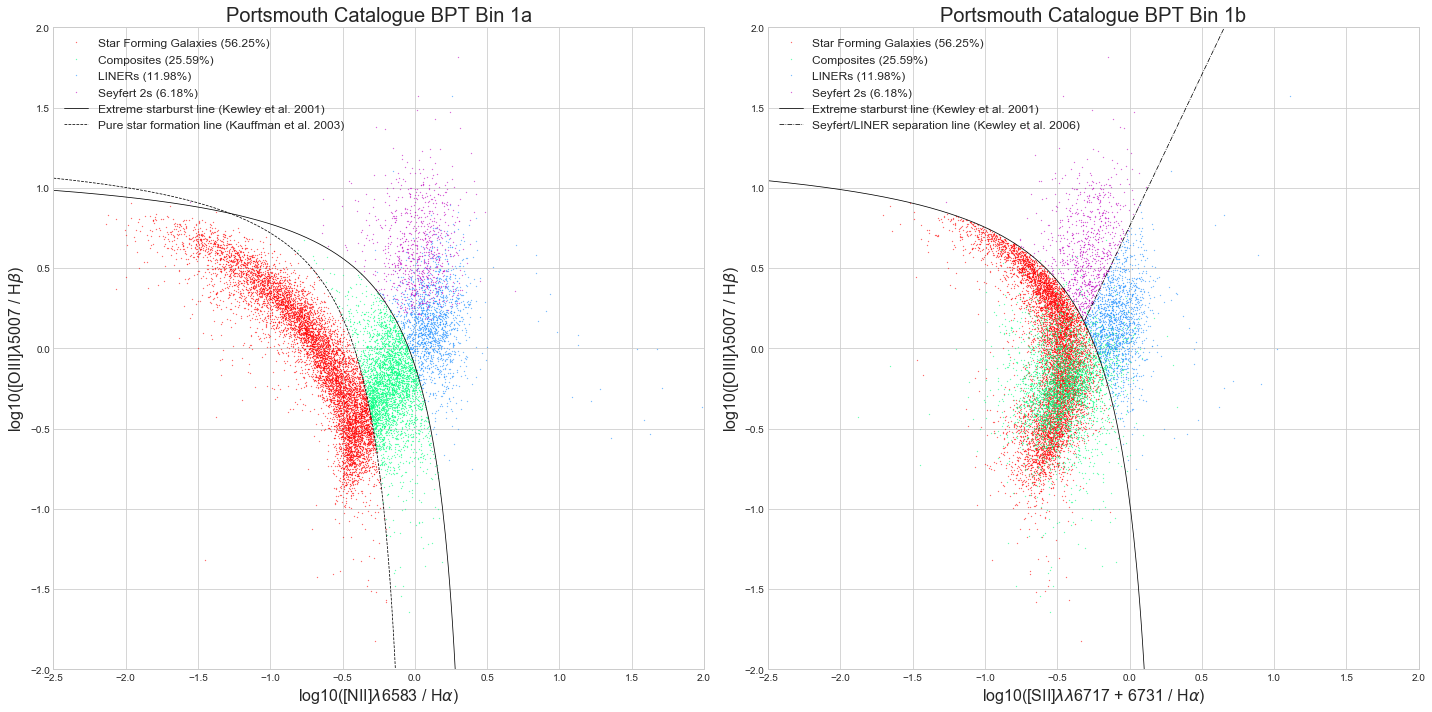

In [21]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10))

#########################################

plt.subplot(1,2,1)

plt.plot(bpt_table1[:, 1][bpt_table1[:, 3] == 1], bpt_table1[:, 0][bpt_table1[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(bpt_percents_1[1]))
plt.plot(bpt_table1[:, 1][bpt_table1[:, 3] == 2], bpt_table1[:, 0][bpt_table1[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(bpt_percents_1[2]))
plt.plot(bpt_table1[:, 1][bpt_table1[:, 3] == 3], bpt_table1[:, 0][bpt_table1[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERs ({:.2f}%)'.format(bpt_percents_1[3]))
plt.plot(bpt_table1[:, 1][bpt_table1[:, 3] == 4], bpt_table1[:, 0][bpt_table1[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(bpt_percents_1[4]))

plt.plot(x1, line1, 'k-', linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')
plt.plot(x, line, 'k--',  linewidth = 0.75, label = 'Pure star formation line (Kauffman et al. 2003)' )

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT Bin 1a', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([NII]$\lambda$6583 / H$\alpha$)', fontsize = 16)
plt.legend(fontsize = 12)

#########################################

plt.subplot(1,2,2)

plt.plot(bpt_table1[:, 2][bpt_table1[:, 3] == 1], bpt_table1[:, 0][bpt_table1[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(bpt_percents_1[1]))
plt.plot(bpt_table1[:, 2][bpt_table1[:, 3] == 2], bpt_table1[:, 0][bpt_table1[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(bpt_percents_1[2]))
plt.plot(bpt_table1[:, 2][bpt_table1[:, 3] == 3], bpt_table1[:, 0][bpt_table1[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERs ({:.2f}%)'.format(bpt_percents_1[3]))
plt.plot(bpt_table1[:, 2][bpt_table1[:, 3] == 4], bpt_table1[:, 0][bpt_table1[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(bpt_percents_1[4]))

plt.plot(x2, line2, 'k-',  linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')
plt.plot(x3, line3, 'k-.', linewidth = 0.75, label = 'Seyfert/LINER separation line (Kewley et al. 2006)')

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT Bin 1b', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([SII]$\lambda$$\lambda$6717 + 6731 / H$\alpha$)', fontsize = 16)
plt.legend(fontsize = 12)

plt.tight_layout()

plt.show()

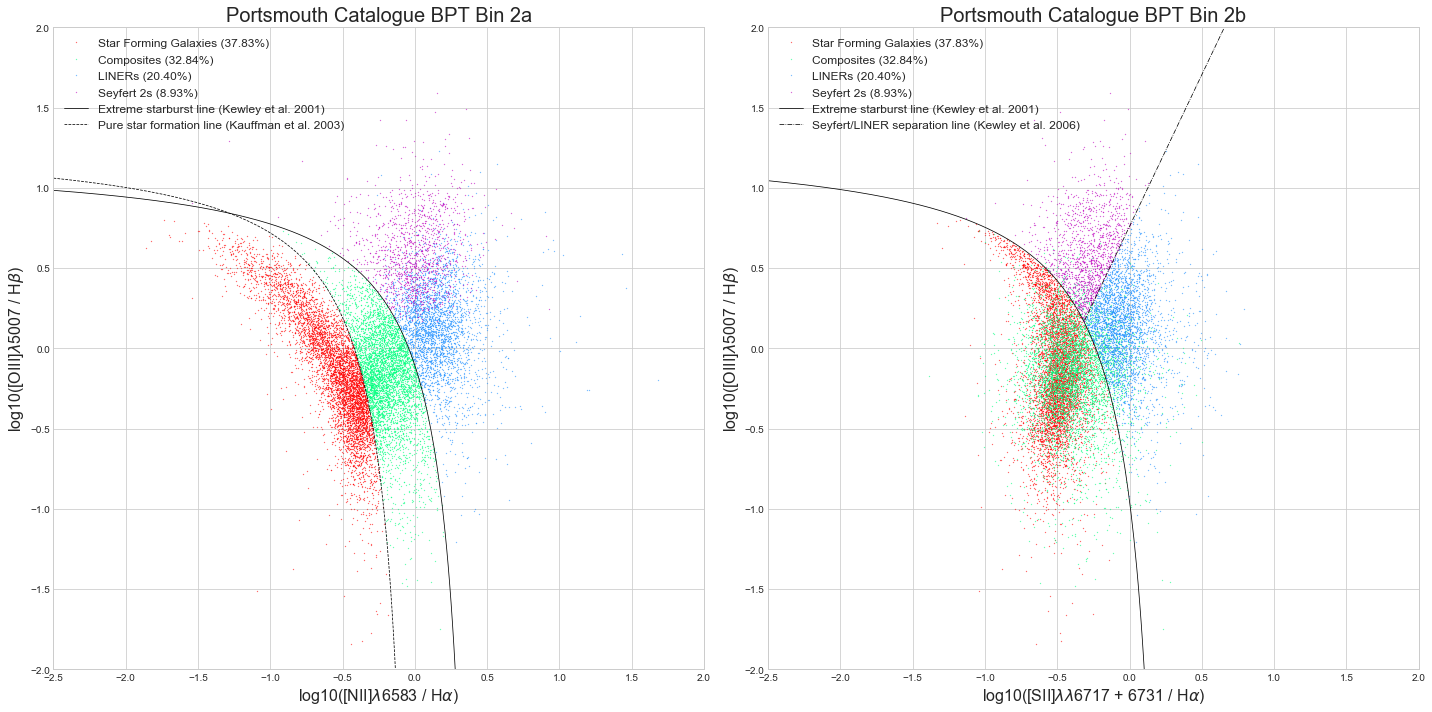

In [22]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10))

#########################################

plt.subplot(1,2,1)

plt.plot(bpt_table2[:, 1][bpt_table2[:, 3] == 1], bpt_table2[:, 0][bpt_table2[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(bpt_percents_2[1]))
plt.plot(bpt_table2[:, 1][bpt_table2[:, 3] == 2], bpt_table2[:, 0][bpt_table2[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(bpt_percents_2[2]))
plt.plot(bpt_table2[:, 1][bpt_table2[:, 3] == 3], bpt_table2[:, 0][bpt_table2[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERs ({:.2f}%)'.format(bpt_percents_2[3]))
plt.plot(bpt_table2[:, 1][bpt_table2[:, 3] == 4], bpt_table2[:, 0][bpt_table2[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(bpt_percents_2[4]))

plt.plot(x1, line1, 'k-', linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')
plt.plot(x, line, 'k--',  linewidth = 0.75, label = 'Pure star formation line (Kauffman et al. 2003)' )

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT Bin 2a', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([NII]$\lambda$6583 / H$\alpha$)', fontsize = 16)
plt.legend(fontsize = 12)

#########################################

plt.subplot(1,2,2)

plt.plot(bpt_table2[:, 2][bpt_table2[:, 3] == 1], bpt_table2[:, 0][bpt_table2[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(bpt_percents_2[1]))
plt.plot(bpt_table2[:, 2][bpt_table2[:, 3] == 2], bpt_table2[:, 0][bpt_table2[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(bpt_percents_2[2]))
plt.plot(bpt_table2[:, 2][bpt_table2[:, 3] == 3], bpt_table2[:, 0][bpt_table2[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERs ({:.2f}%)'.format(bpt_percents_2[3]))
plt.plot(bpt_table2[:, 2][bpt_table2[:, 3] == 4], bpt_table2[:, 0][bpt_table2[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(bpt_percents_2[4]))

plt.plot(x2, line2, 'k-',  linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')
plt.plot(x3, line3, 'k-.', linewidth = 0.75, label = 'Seyfert/LINER separation line (Kewley et al. 2006)')

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT Bin 2b', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([SII]$\lambda$$\lambda$6717 + 6731 / H$\alpha$)', fontsize = 16)
plt.legend(fontsize = 12)

plt.tight_layout()

plt.show()

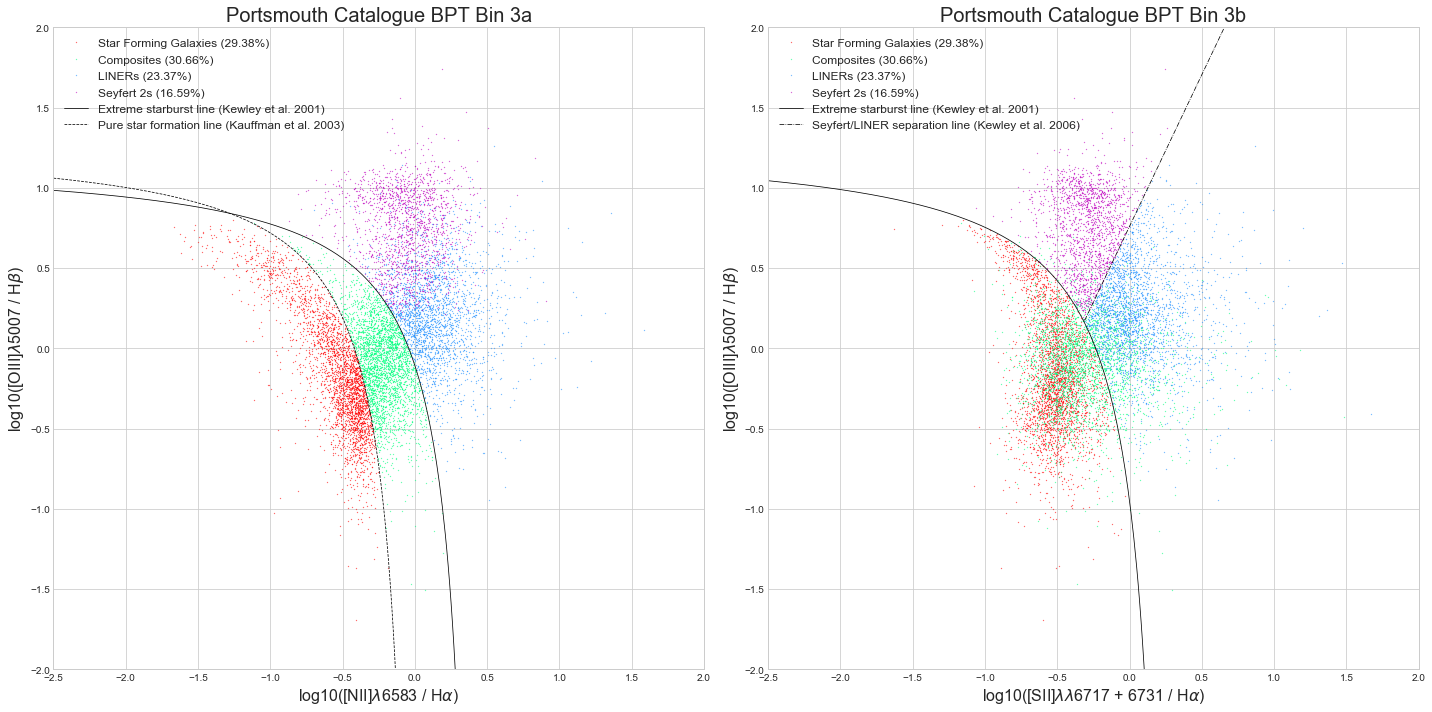

In [23]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10))

#########################################

plt.subplot(1,2,1)

plt.plot(bpt_table3[:, 1][bpt_table3[:, 3] == 1], bpt_table3[:, 0][bpt_table3[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(bpt_percents_3[1]))
plt.plot(bpt_table3[:, 1][bpt_table3[:, 3] == 2], bpt_table3[:, 0][bpt_table3[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(bpt_percents_3[2]))
plt.plot(bpt_table3[:, 1][bpt_table3[:, 3] == 3], bpt_table3[:, 0][bpt_table3[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERs ({:.2f}%)'.format(bpt_percents_3[3]))
plt.plot(bpt_table3[:, 1][bpt_table3[:, 3] == 4], bpt_table3[:, 0][bpt_table3[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(bpt_percents_3[4]))

plt.plot(x1, line1, 'k-', linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')
plt.plot(x, line, 'k--',  linewidth = 0.75, label = 'Pure star formation line (Kauffman et al. 2003)' )

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT Bin 3a', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([NII]$\lambda$6583 / H$\alpha$)', fontsize = 16)
plt.legend(fontsize = 12)

#########################################

plt.subplot(1,2,2)

plt.plot(bpt_table3[:, 2][bpt_table3[:, 3] == 1], bpt_table3[:, 0][bpt_table3[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(bpt_percents_3[1]))
plt.plot(bpt_table3[:, 2][bpt_table3[:, 3] == 2], bpt_table3[:, 0][bpt_table3[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(bpt_percents_3[2]))
plt.plot(bpt_table3[:, 2][bpt_table3[:, 3] == 3], bpt_table3[:, 0][bpt_table3[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERs ({:.2f}%)'.format(bpt_percents_3[3]))
plt.plot(bpt_table3[:, 2][bpt_table3[:, 3] == 4], bpt_table3[:, 0][bpt_table3[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(bpt_percents_3[4]))

plt.plot(x2, line2, 'k-',  linewidth = 0.75, label = 'Extreme starburst line (Kewley et al. 2001)')
plt.plot(x3, line3, 'k-.', linewidth = 0.75, label = 'Seyfert/LINER separation line (Kewley et al. 2006)')

plt.xlim(-2.5,2)
plt.ylim(-2,2)

plt.title('Portsmouth Catalogue BPT Bin 3b', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([SII]$\lambda$$\lambda$6717 + 6731 / H$\alpha$)', fontsize = 16)
plt.legend(fontsize = 12)

plt.tight_layout()

plt.show()


In [24]:
"""
For the Blue classification:

need OIII5007, HBeta flux, 
     OII 3726, OII 3729, HBeta EW
"""

'\nFor the Blue classification:\n\nneed OIII5007, HBeta flux, \n     OII 3726, OII 3729, HBeta EW\n'

In [25]:
OIII5007_flux4 = emlinkin_good_data4['FLUX'][:, 17]
HBeta_flux4    = emlinkin_good_data4['FLUX'][:, 15]

OII3726_EW4 = emlinkin_good_data4['EW'][:, 3]
OII3729_EW4 = emlinkin_good_data4['EW'][:, 4]
OII_EW4     = OII3726_EW4 + OII3729_EW4

HBeta_EW4   = emlinkin_good_data4['EW'][:, 15]

#########################################

OII3726_EW3 = emlinkin_good_data3['EW'][:, 3]
OII3729_EW3 = emlinkin_good_data3['EW'][:, 4]
OII_EW3     = OII3726_EW3 + OII3729_EW3

HBeta_EW3   = emlinkin_good_data3['EW'][:, 15]

#########################################

blu_y_4 = OIII5007_flux4 / HBeta_flux4
blu_x_4 = OII_EW4 / HBeta_EW4

blu_y_4 = np.log10(blu_y_4)
blu_x_4 = np.log10(blu_x_4)

#########################################

blu_x_3 = OII_EW3 / HBeta_EW3

#we can just reuse the OIII/HB column from the BPT
blu_y_3 = bpt_table3[:, 0]
blu_x_3 = np.log10(blu_x_3)

In [26]:
#classify galaxies based on Blue diagram

# 0 fail
# 1 star forming (HII)
# 2 Composite
# 3 LINER
# 4 Seyfert2
# 5 SFG/Seyfert2

# for the rows
# 0 OIII/HB FLUX RATIO
# 1 OII/HB EW RATIO
# 2 classification

blu_table3 = np.zeros((len(blu_y_3), 3))
blu_table3[:, 0] = blu_y_3
blu_table3[:, 1] = blu_x_3

for row in blu_table3:
    
    #SFG
    if ( row[0] < 0.3 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) > 0.11 ):
        row[2] = 1
    
    #SF/Seyfert2
    elif ( row[0] > 0.3 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) > 0.11 ):
        row[2] = 5
    
    #Seyfert2
    elif ( row[0] > ( 0.95 * row[1] ) - 0.4 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) < 0.11 ):
        row[2] = 4
    
    #LINER
    elif ( row[0] < ( 0.95 * row[1] ) - 0.4 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) < 0.11 ):
        row[2] = 3
        
    #Composite
    if ( row[0] >= ( row[1] - 0.2 ) ** 2 - 0.6 ) and ( row[0] <= -( row[1] - 1 ) ** 2 - 0.1 * row[1] + 0.25 ):
        row[2] = 2
    
    if ( row[2] == 5 ):
        if ( row[0] > 0.9 ):
            if ( row[0] < ( 0.95 * row[1] ) - 0.4 ):
                row[2] = 3
            elif ( row[0] > ( 0.95 * row[1] ) - 0.4 ):
                row[2] = 4
    
classification = blu_table3[:, 2] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
blu_counts_3 = dict(zip(unique, counts)) #put into dictionary

print('Bin 3')
print(blu_counts_3) #print the dictionary to view the wing values

#########################################

blu_table4 = np.zeros((len(blu_y_4), 3))
blu_table4[:, 0] = blu_y_4
blu_table4[:, 1] = blu_x_4

for row in blu_table4:
    
    #SFG
    if ( row[0] < 0.3 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) > 0.11 ):
        row[2] = 1
    
    #SF/Seyfert2
    elif ( row[0] > 0.3 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) > 0.11 ):
        row[2] = 5
    
    #Seyfert2
    elif ( row[0] > ( 0.95 * row[1] ) - 0.4 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) < 0.11 ):
        row[2] = 4
    
    #LINER
    elif ( row[0] < ( 0.95 * row[1] ) - 0.4 ) and ( ( row[0] - 0.85 ) * ( row[1] - 0.92 ) < 0.11 ):
        row[2] = 3
        
    #Composite
    if ( row[0] >= ( row[1] - 0.2 ) ** 2 - 0.6 ) and ( row[0] <= -( row[1] - 1 ) ** 2 - 0.1 * row[1] + 0.25 ):
        row[2] = 2
    
    if ( row[2] == 5 ):
        if ( row[0] > 0.9 ):
            if ( row[0] < ( 0.95 * row[1] ) - 0.4 ):
                row[2] = 3
            elif ( row[0] > ( 0.95 * row[1] ) - 0.4 ):
                row[2] = 4
    
classification = blu_table4[:, 2] #convert the list into an array for faster processing
unique, counts = np.unique(classification, return_counts=True) #count occurences of each flag
blu_counts_4 = dict(zip(unique, counts)) #put into dictionary

print('Bin 4')
print(blu_counts_4) #print the dictionary to view the wing values

Bin 3
{1.0: 2075, 2.0: 2600, 3.0: 4243, 4.0: 1245, 5.0: 607}
Bin 4
{1.0: 923, 2.0: 1150, 3.0: 1254, 4.0: 1265, 5.0: 221}


In [27]:
sources_count_3_a = 0

sources_count_4 = 0

for key in blu_counts_4:
    sources_count_4 += blu_counts_4[key]
    
for key in blu_counts_3:
    sources_count_3_a += blu_counts_3[key]
    
blu_percents_4 = blu_counts_4
blu_percents_3 = blu_counts_3

for key in blu_percents_4:
    blu_percents_4[key] = 100 * blu_percents_4[key] / sources_count_4

for key in blu_percents_3:
    blu_percents_3[key] = 100 * blu_percents_3[key] / sources_count_3

In [28]:
#Prep lines for blue classification

h1 = np.arange(0.09,1.06,0.01)
h2 = np.arange(0.09,1.065,0.001)
v1 = -(h1 - 1)**2 - 0.1 * h1 + 0.25
v2 = (h2 - 0.2)**2 - 0.6

h3 = np.arange(-1.5, 0.92, 0.01)
v3 = 0.11 / (h3-0.92) + 0.85

h4 = np.arange(-1.5, 0.72, 0.01)
v4 = np.full(len(h4), 0.3)

h5 = np.arange(0.724, 2.6, 0.001)
v5 = 0.95 * h5 - 0.4 

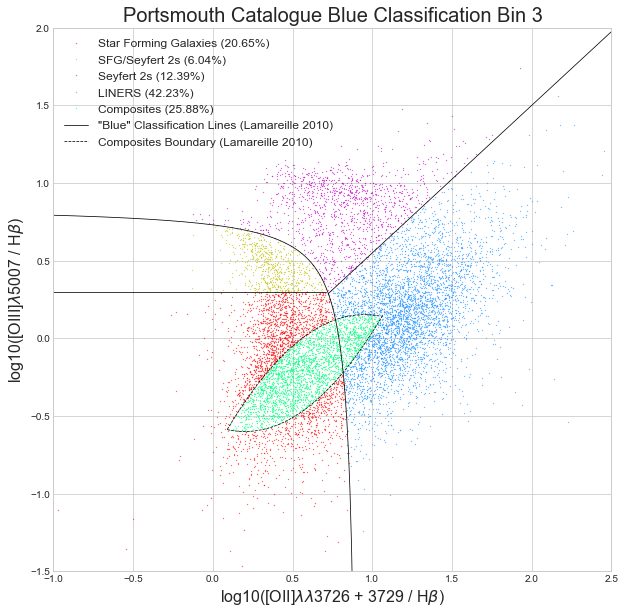

In [29]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(blu_table3[:, 1][blu_table3[:, 2] == 1], blu_table3[:, 0][blu_table3[:, 2] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(blu_percents_3[1]))
plt.plot(blu_table3[:, 1][blu_table3[:, 2] == 5], blu_table3[:, 0][blu_table3[:, 2] == 5], color = 'y',           linestyle = '', marker = '.', ms = 0.5, label = 'SFG/Seyfert 2s ({:.2f}%)'.format(blu_percents_3[5]))
plt.plot(blu_table3[:, 1][blu_table3[:, 2] == 4], blu_table3[:, 0][blu_table3[:, 2] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(blu_percents_3[4]))
plt.plot(blu_table3[:, 1][blu_table3[:, 2] == 3], blu_table3[:, 0][blu_table3[:, 2] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERS ({:.2f}%)'.format(blu_percents_3[3]))
plt.plot(blu_table3[:, 1][blu_table3[:, 2] == 2], blu_table3[:, 0][blu_table3[:, 2] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(blu_percents_3[2]))

plt.plot(h3, v3, 'k-',  linewidth = 0.75, label = '"Blue" Classification Lines (Lamareille 2010)')
plt.plot(h4, v4, 'k-',  linewidth = 0.75)
plt.plot(h5, v5, 'k-',  linewidth = 0.75)
plt.plot(h1, v1, 'k--', linewidth = 0.75, label = 'Composites Boundary (Lamareille 2010)')
plt.plot(h2, v2, 'k--', linewidth = 0.75)

plt.ylim(-1.5, 2)
plt.xlim(-1, 2.5)

plt.title('Portsmouth Catalogue Blue Classification Bin 3', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([OII]$\lambda$$\lambda$3726 + 3729 / H$\beta$)', fontsize = 16)
plt.legend(loc = 2, fontsize = 12)

plt.show()

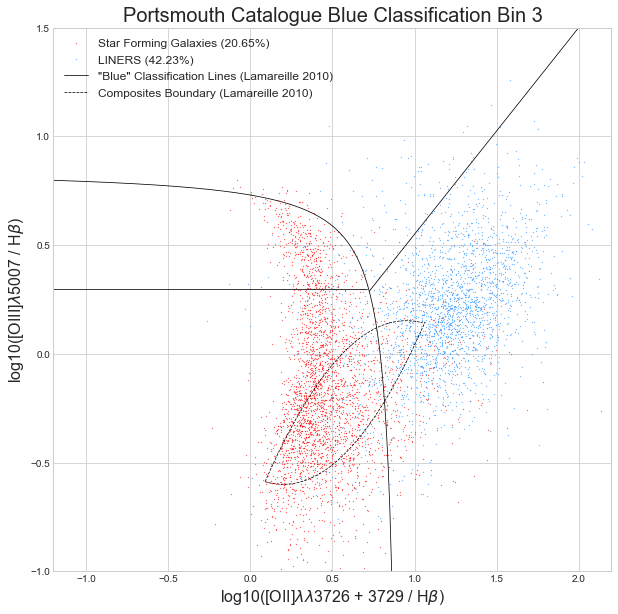

In [30]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 1], blu_table3[:, 0][bpt_table3[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(blu_percents_3[1]))
# plt.plot(blu_table3[:, 1][bpt_table3[:, 2] == 5], blu_table3[:, 0][bpt_table3[:, 2] == 5], color = 'y',           linestyle = '', marker = '.', ms = 0.5, label = 'SFG/Seyfert 2s ({:.2f}%)'.format(blu_percents_3[5]))
# plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 4], blu_table3[:, 0][bpt_table3[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(blu_percents_3[4]))
plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 3], blu_table3[:, 0][bpt_table3[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERS ({:.2f}%)'.format(blu_percents_3[3]))
# plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 2], blu_table3[:, 0][bpt_table3[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(blu_percents_3[2]))

plt.plot(h3, v3, 'k-',  linewidth = 0.75, label = '"Blue" Classification Lines (Lamareille 2010)')
plt.plot(h4, v4, 'k-',  linewidth = 0.75)
plt.plot(h5, v5, 'k-',  linewidth = 0.75)
plt.plot(h1, v1, 'k--', linewidth = 0.75, label = 'Composites Boundary (Lamareille 2010)')
plt.plot(h2, v2, 'k--', linewidth = 0.75)

plt.ylim(-1, 1.5)
plt.xlim(-1.2, 2.2)

plt.title('Portsmouth Catalogue Blue Classification Bin 3', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([OII]$\lambda$$\lambda$3726 + 3729 / H$\beta$)', fontsize = 16)
plt.legend(loc = 2, fontsize = 12)

plt.show()

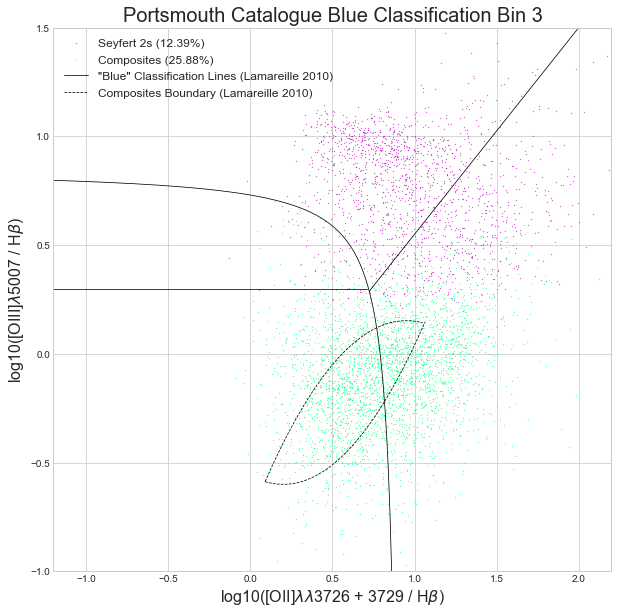

In [31]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

# plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 1], blu_table3[:, 0][bpt_table3[:, 3] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(blu_percents_3[1]))
# plt.plot(blu_table3[:, 1][bpt_table3[:, 2] == 5], blu_table3[:, 0][bpt_table3[:, 2] == 5], color = 'y',           linestyle = '', marker = '.', ms = 0.5, label = 'SFG/Seyfert 2s ({:.2f}%)'.format(blu_percents_3[5]))
plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 4], blu_table3[:, 0][bpt_table3[:, 3] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(blu_percents_3[4]))
# plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 3], blu_table3[:, 0][bpt_table3[:, 3] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERS ({:.2f}%)'.format(blu_percents_3[3]))
plt.plot(blu_table3[:, 1][bpt_table3[:, 3] == 2], blu_table3[:, 0][bpt_table3[:, 3] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(blu_percents_3[2]))

plt.plot(h3, v3, 'k-',  linewidth = 0.75, label = '"Blue" Classification Lines (Lamareille 2010)')
plt.plot(h4, v4, 'k-',  linewidth = 0.75)
plt.plot(h5, v5, 'k-',  linewidth = 0.75)
plt.plot(h1, v1, 'k--', linewidth = 0.75, label = 'Composites Boundary (Lamareille 2010)')
plt.plot(h2, v2, 'k--', linewidth = 0.75)

plt.ylim(-1, 1.5)
plt.xlim(-1.2, 2.2)

plt.title('Portsmouth Catalogue Blue Classification Bin 3', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([OII]$\lambda$$\lambda$3726 + 3729 / H$\beta$)', fontsize = 16)
plt.legend(loc = 2, fontsize = 12)

plt.show()

In [32]:
compare_table = np.zeros((len(bpt_y_3), 2))
compare_table[:, 0] = bpt_table3[:, 3]
compare_table[:, 1] = blu_table3[:, 2]

In [33]:
compare_table

array([[3., 3.],
       [4., 3.],
       [2., 1.],
       ...,
       [1., 2.],
       [1., 5.],
       [2., 2.]])

In [34]:
bin3_count = len(compare_table)
classification_agree = 0

for row in compare_table:
    if row[0] == row[1]:
        classification_agree += 1
    if row[1] == 5:
        if row[0] == 1:
            classification_agree += 1
        elif row[0] == 4:
            classification_agree += 1
            
print( 100 * classification_agree / bin3_count)

53.52831940575673


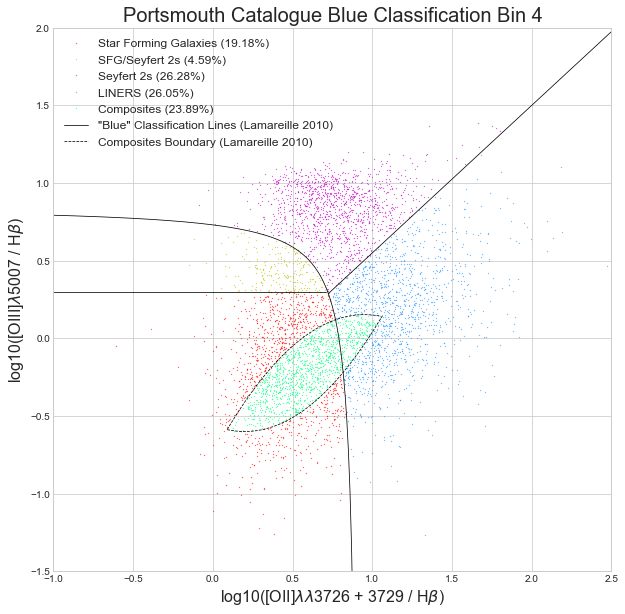

In [35]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(blu_table4[:, 1][blu_table4[:, 2] == 1], blu_table4[:, 0][blu_table4[:, 2] == 1], color = 'r',           linestyle = '', marker = '.', ms = 0.5, label = 'Star Forming Galaxies ({:.2f}%)'.format(blu_percents_4[1]))
plt.plot(blu_table4[:, 1][blu_table4[:, 2] == 5], blu_table4[:, 0][blu_table4[:, 2] == 5], color = 'y',           linestyle = '', marker = '.', ms = 0.5, label = 'SFG/Seyfert 2s ({:.2f}%)'.format(blu_percents_4[5]))
plt.plot(blu_table4[:, 1][blu_table4[:, 2] == 4], blu_table4[:, 0][blu_table4[:, 2] == 4], color = 'm',           linestyle = '', marker = '.', ms = 0.5, label = 'Seyfert 2s ({:.2f}%)'.format(blu_percents_4[4]))
plt.plot(blu_table4[:, 1][blu_table4[:, 2] == 3], blu_table4[:, 0][blu_table4[:, 2] == 3], color = 'dodgerblue',  linestyle = '', marker = '.', ms = 0.5, label = 'LINERS ({:.2f}%)'.format(blu_percents_4[3]))
plt.plot(blu_table4[:, 1][blu_table4[:, 2] == 2], blu_table4[:, 0][blu_table4[:, 2] == 2], color = 'springgreen', linestyle = '', marker = '.', ms = 0.5, label = 'Composites ({:.2f}%)'.format(blu_percents_4[2]))

plt.plot(h3, v3, 'k-',  linewidth = 0.75, label = '"Blue" Classification Lines (Lamareille 2010)')
plt.plot(h4, v4, 'k-',  linewidth = 0.75)
plt.plot(h5, v5, 'k-',  linewidth = 0.75)
plt.plot(h1, v1, 'k--', linewidth = 0.75, label = 'Composites Boundary (Lamareille 2010)')
plt.plot(h2, v2, 'k--', linewidth = 0.75)

plt.ylim(-1.5, 2)
plt.xlim(-1, 2.5)

plt.title('Portsmouth Catalogue Blue Classification Bin 4', fontsize = 20)
plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([OII]$\lambda$$\lambda$3726 + 3729 / H$\beta$)', fontsize = 16)
plt.legend(loc = 2, fontsize = 12)

plt.show()

In [36]:
OIII_flux = emlinkin_good_data['FLUX'][:, 17]
OII3726_flux = emlinkin_good_data['FLUX'][:, 3]
OII3729_flux = emlinkin_good_data['FLUX'][:, 4]
OII_flux = OII3726_flux + OII3729_flux
z = emlinkin_good_data['Z']

O_ionization_param = OIII_flux / OII_flux

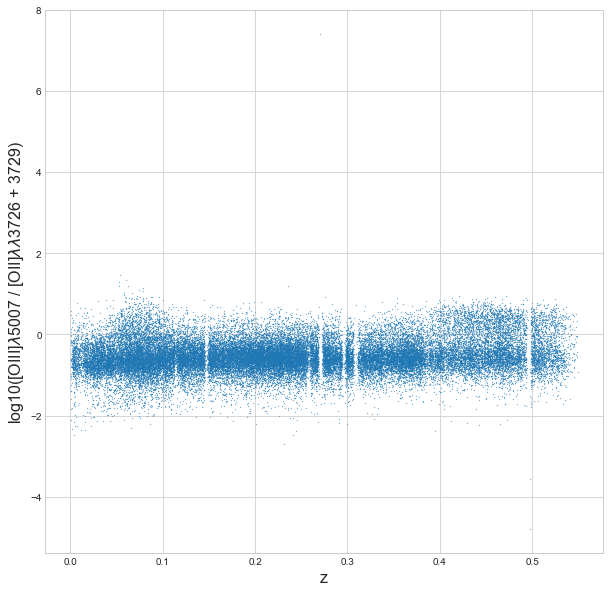

In [37]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(z, np.log10(O_ionization_param), linestyle = '', marker = '.', ms = 0.5, label = '')

# plt.ylim(-3, 3)

plt.xlabel('z', fontsize = 16)
plt.ylabel(r'log10([OIII]$\lambda$5007 / [OII]$\lambda$$\lambda$3726 + 3729)', fontsize = 16)

plt.show()

In [38]:
HB_EW = emlinkin_good_data['EW'][:, 15]
HB_flux = emlinkin_good_data['FLUX'][:, 15]

In [39]:
OIIIHB = OIII_flux / HB_flux

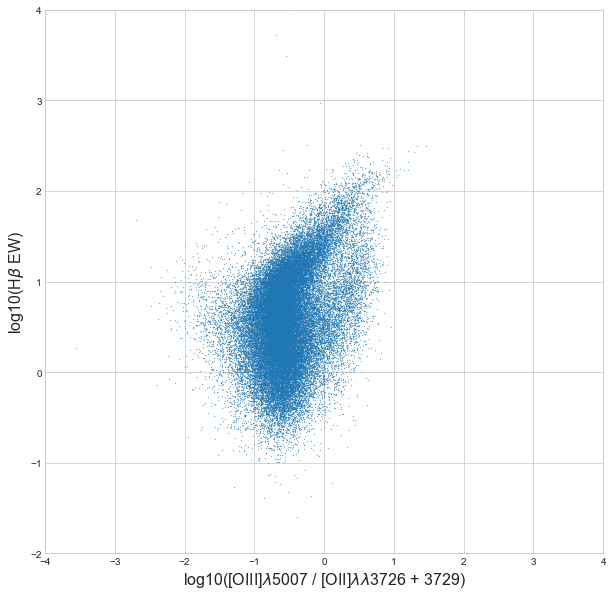

In [40]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(np.log10(O_ionization_param), np.log10(HB_EW), linestyle = '', marker = '.', ms = 0.5, label = '')

plt.xlim(-4, 4)
plt.ylim(-2, 4)

plt.ylabel(r'log10(H$\beta$ EW)', fontsize = 16)
plt.xlabel(r'log10([OIII]$\lambda$5007 / [OII]$\lambda$$\lambda$3726 + 3729)', fontsize = 16)

plt.show()

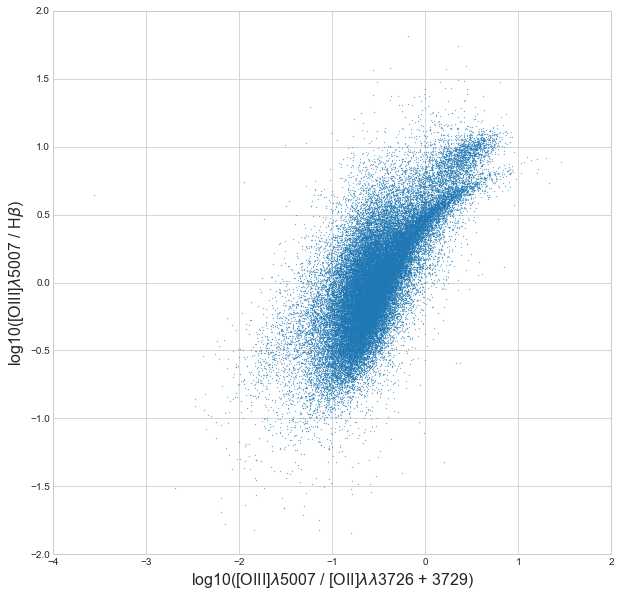

In [41]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))

plt.plot(np.log10(O_ionization_param), np.log10(OIIIHB), linestyle = '', marker = '.', ms = 0.5, label = '')

plt.ylim(-2, 2)
plt.xlim(-4, 2)

plt.ylabel(r'log10([OIII]$\lambda$5007 / H$\beta$)', fontsize = 16)
plt.xlabel(r'log10([OIII]$\lambda$5007 / [OII]$\lambda$$\lambda$3726 + 3729)', fontsize = 16)

# plt.savefig('OIIIHB_OIIIOII.png')

plt.show()

In [42]:
AGN_zbin1 = emlinkin_good_data1[bpt_table1[:, 3] == 4]
AGN_zbin2 = emlinkin_good_data2[bpt_table2[:, 3] == 4]
AGN_zbin3 = emlinkin_good_data3[bpt_table3[:, 3] == 4]
AGN_zbin4 = emlinkin_good_data4[blu_table4[:, 2] == 4]

In [43]:
# (Table(AGN_zbin1)).write('AGN_zbin1.fits')
# (Table(AGN_zbin2)).write('AGN_zbin2.fits')
# (Table(AGN_zbin3)).write('AGN_zbin3.fits')
# (Table(AGN_zbin4)).write('AGN_zbin4.fits')